# California Housing Prices

## このJupyter Notebookについて

このノートブックは以下を参考にして作っております。

https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

興味がある方は参考ノートブックをぜひご覧ください。

ただ、参考ノートブックはコードだけで分かりにくいため、分かりやすくなるようこのノートブックを作りました。今後の勉強資料になれば幸いでございます。

日本語で上手く説明出来ないため、皆様のご協力もお願いします。

## Source

This is the dataset used in this book: https://github.com/ageron/handson-ml/tree/master/datasets/housing to illustrate a sample end-to-end ML project workflow (pipeline). 

The data is based on California Census in 1990.

今回のデータのリンク：https://github.com/ageron/handson-ml/tree/master/datasets/housing

1990年California物件データ

## About the Data (from the book):
## データについて

"This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

The following is the description from the book author:

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The dataset in this directory is almost identical to the original, with two differences:
207 values were randomly removed from the totalbedrooms column, so we can discuss what to do with missing data. An additional categorical attribute called oceanproximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

このデータは1990年度カリフォルニア国勢調査のデータです。一列に一丁目にいる人口データが記入されてます。一丁目にやく600人から3000人います。

このデータなかのhouseholsは一丁目にある物件数です。roomsは物件内にある戸数です。

このデータと元データの違いはtotal_bedrooms桁から207データを適当に削除してます。ocean_proximity桁も追加して海との近さを表示します。

## About the Data (From Luís Torgo page):（元データ）

http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html

This is a dataset obtained from the StatLib repository. Here is the included description:

"We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value)."

## 1. セットアップ

#### 1.1 必要なライブラリーをインポートしたます。Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.2 データをインポートしたます。Importing Data and setting decimal points to 3 places

In [2]:
housing = pd.read_csv('housing.txt', sep = ',')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('float_format', '{:.3f}'.format)

#### 1.3　データチェック。 Checking Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude = 経度

latitude = 緯度

housing_median_age = 住宅年齢

total_rooms = 戸合計

total_bedrooms =　ベットルーム合計

population =　人口

households =　件

median_income =　収入の中央値

median_house_value = 住宅価値の中央値

ocean_proximity = 海の近接

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


describe()でデータをざっと見ると一丁目に平均人口は1425.5人、499.5物件、3.871(百万ドル)収入とターゲットの物件値段は206855.8ドルと分かります。

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

null数が207もあります。後で自動に入力できるようにします。

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<1H OCEAN     海まで1時間以内

INLAND        内陸

NEAR OCEAN    海の近く

NEAR BAY      海岸の近く

ISLAND 　　　　島

#### 1.4 各Histogramを見てみます

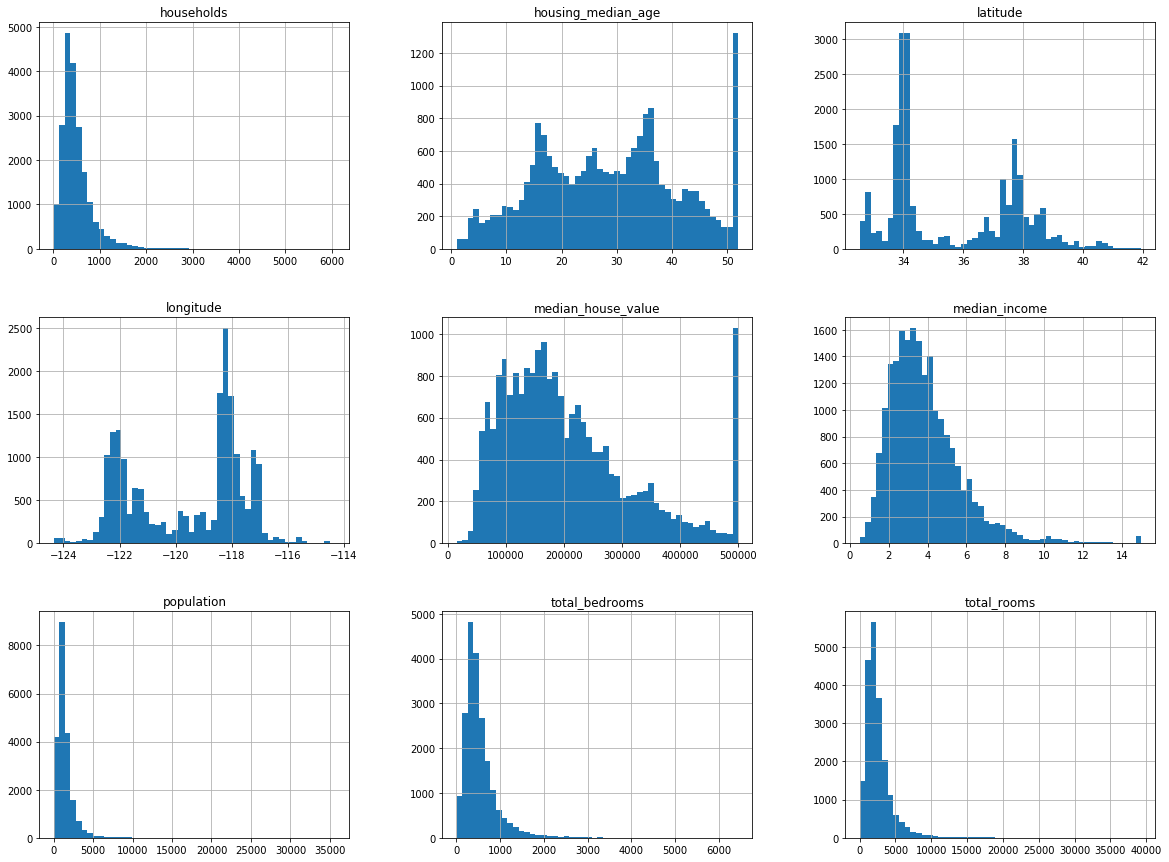

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### 1.5 Correlation Matrixで値段に強く影響しているものを検索してみます。

In [9]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000
median_income         0.688
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64

家の値段は収入の影響が強いことが分かりました。収入のHistogramを大きく見てみます。

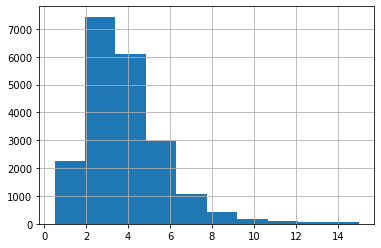

In [10]:
housing["median_income"].hist()

上の図を見るとほとんどの収入は1.5～7に集中してます。しかし、小数の収入は15まで広げてます。

収入を分けます。理由はデータを学習データとチェックデータに分ける時各分けに収入が同じくなるようにです。

Above histogram shows most of median_income range from 1.5 to 7. But, some have median_income upto 15.

Let's divide the income into 5 parts(0-1.5, 1.5-3, 3-4.5, 4.5-6 and above 6). We are going to use stratified shuffle split.

This is to re-arrange index of data based on income categories when we use StratifiedSplitShuffle later. This will ensure any random sample taken from the dataset will contains the same proportion of population with median_income as the whole dataset. Note that categorizing the median_income does not modify any data.

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '>6'])

with .value_counts(), we can see now easily see population of each income category.

In [12]:
housing["income_cat"].value_counts()

3-4.5    7236
1.5-3    6581
4.5-6    3639
>6       2362
0-1.5     822
Name: income_cat, dtype: int64

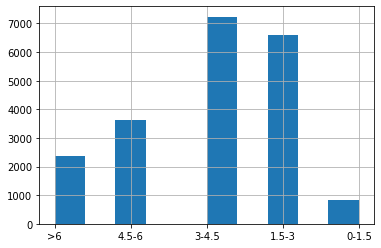

In [13]:
housing["income_cat"].hist()

上の図は逆になってますが解決方法分かり次第修正します。

## 2. データをVisualizeしましょう。

#### 2.1 プロットします

データには経度と緯度があるため物件集中度を地図みたいにプロット出来ます。

scatterプロットでマーカーは青の円にしてます。色が濃いところに物件が集中してます。

Text(0.5, 1.0, 'California Housing Density Scatterplot')

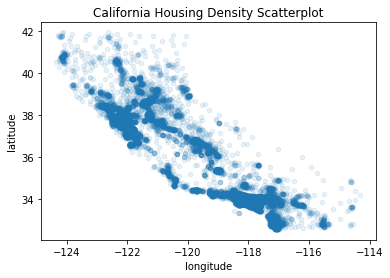

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title('California Housing Density Scatterplot')

#### 2.2 プロットをもっと見やすくする

上の図を見て情報をつかめないとおもいます。

そこで人口と値段を追加します。

以下のコードのなかの"ｓ"はスケールで人口を表示します。“/100”はマーカーサイズを調整するためです。

人口が多ければ円のスケールが大きくなります（大きい円になる）。

“ｃ”はカーラーで値段を表示します。値段が高いところは赤に近づきます。

もっと分かりやすくなるように“colorbar”も追加します。

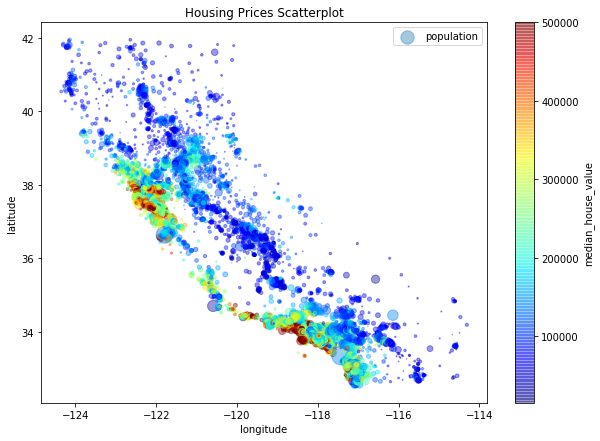

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Housing Prices Scatterplot')
plt.legend()

#### 2.3 地図も貼り付けましょう

ここまでは順調です。

しかし、本物の地図も追加するとどの町に物件が集中してるのかも分かります。

以下のコードの

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))

extentのなかに経度と緯度を入力で本当の地図に近いプロットが出来ます。

“california”に“california_gmap”も入力してみるとGoogle Mapからスクリーンショットした地図がでます。

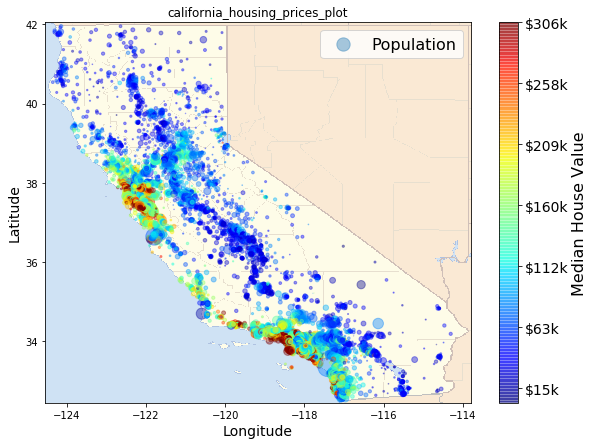

In [16]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.title('california_housing_prices_plot')
plt.show()

サンフランシスコとロサンゼルスに人口がもっと集まり、物件値段も高い（＄209,000以上）でことが分かります。

#### 2.3 ペアープロットも見てみます。

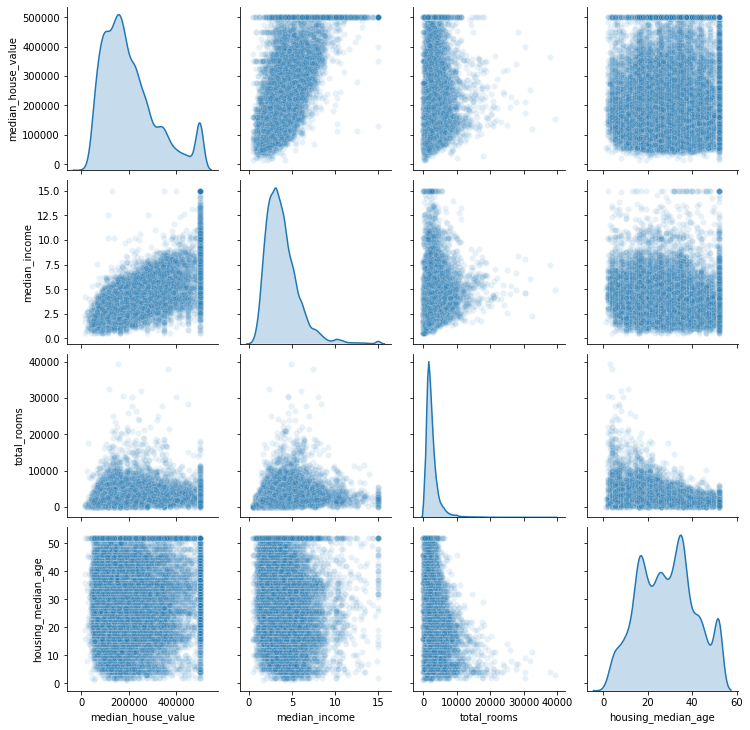

In [17]:
sns.pairplot(housing, vars=["median_house_value", "median_income", "total_rooms",
                            "housing_median_age"], 
             diag_kind="kde", kind='scatter', plot_kws={'alpha':0.1})
plt.show()

後に必要になるかも知らないものも追加します。

In [18]:
temp_housing = housing.copy()
temp_housing["rooms_per_household"] = temp_housing["total_rooms"]/housing["households"]
temp_housing["bedrooms_per_room"] = temp_housing["total_bedrooms"]/housing["total_rooms"]
temp_housing["population_per_household"] = temp_housing["population"]/housing["households"]

In [19]:
corr_matrix = temp_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000
median_income               0.688
rooms_per_household         0.152
total_rooms                 0.134
housing_median_age          0.106
households                  0.066
total_bedrooms              0.050
population_per_household   -0.024
population                 -0.025
longitude                  -0.046
latitude                   -0.144
bedrooms_per_room          -0.256
Name: median_house_value, dtype: float64

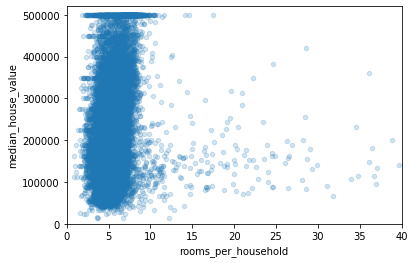

In [20]:
temp_housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 40, 0, 520000])
plt.show()

## 3. 機械学習アルゴリズムのため準備します

#### 3.1 StratifiedShuffleSplitでデータを分けます。収入分けにします。

以下のコードはデータを学習データ80％とテストデータ20％に分けます。StratifiedShuffleSplitなので収入分けにインデックスが並び替えます。

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]

## Following are for why use SSS Explanation. No Need in actual coding. 
### StratifiedShuffleSplit VS Train_Test_Split


In [22]:
housing["income_cat"].value_counts()

3-4.5    7236
1.5-3    6581
4.5-6    3639
>6       2362
0-1.5     822
Name: income_cat, dtype: int64

In [23]:
len(housing)

20640

In [24]:
housing["income_cat"].value_counts() / len(housing)

3-4.5   0.351
1.5-3   0.319
4.5-6   0.176
>6      0.114
0-1.5   0.040
Name: income_cat, dtype: float64

In [25]:
stratified_train_set["income_cat"].value_counts()

3-4.5    5789
1.5-3    5265
4.5-6    2911
>6       1889
0-1.5     658
Name: income_cat, dtype: int64

In [26]:
len(stratified_train_set)

16512

In [27]:
stratified_train_set["income_cat"].value_counts() / len(stratified_train_set)

3-4.5   0.351
1.5-3   0.319
4.5-6   0.176
>6      0.114
0-1.5   0.040
Name: income_cat, dtype: float64

In [28]:
stratified_test_set["income_cat"].value_counts()

3-4.5    1447
1.5-3    1316
4.5-6     728
>6        473
0-1.5     164
Name: income_cat, dtype: int64

In [29]:
len(stratified_test_set)

4128

In [30]:
stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

3-4.5   0.351
1.5-3   0.319
4.5-6   0.176
>6      0.115
0-1.5   0.040
Name: income_cat, dtype: float64

In [31]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [32]:
from sklearn.model_selection import train_test_split
rand_train_set, rand_test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [33]:
compare_proportions = pd.DataFrame({
                            "Overall%": income_cat_proportions(housing) * 100,
                            "Stratified%": income_cat_proportions(stratified_test_set) * 100,
                            "Random%": income_cat_proportions(rand_test_set) * 100,
                            }).sort_index()
compare_proportions["Rand. %error"] = ( 100 * ( compare_proportions["Random%"] / compare_proportions["Overall%"] ) )- 100
compare_proportions["Strat. %error"] = ( 100 * ( compare_proportions["Stratified%"] / compare_proportions["Overall%"] ) ) - 100

In [34]:
compare_proportions

,Overall%,Stratified%,Random%,Rand. %error,Strat. %error
0-1.5,3.983,3.973,4.021,0.973,-0.243
1.5-3,31.885,31.880,32.437,1.732,-0.015
3-4.5,35.058,35.053,35.853,2.266,-0.014
4.5-6,17.631,17.636,16.739,-5.056,0.027
>6,11.444,11.458,10.950,-4.318,0.127


上の表のようにTrain_Test_Splitで分けるとエラー％が大きいです。
Train_Test_Splitには収入で分けてないため適当に選んだサンプルのなかに各収入が全体のデータと同じく分けてありません。
一方、Stratified_Shuffle_Splitは収入ごとに分けているため全体のデータと同じくなります。

### ここまでがStratifiedShuffleSplit VS Train_Test_Splitの違いの説明終わり。

#### 3.2 “income_cat”はもういらないため削除ます。

In [35]:
for set_ in (stratified_train_set, stratified_test_set):
     set_.drop("income_cat", axis=1, inplace=True)

stratified_housingに値段以外のデータを入れます。
housing_targetは予測するデータ（値段）です。

In [36]:
stratified_housing = stratified_train_set.drop("median_house_value", axis=1)
housing_target = stratified_train_set["median_house_value"].values

In [37]:
stratified_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.890,37.290,38.000,1568.000,351.000,710.000,339.000,2.704,<1H OCEAN
18632,-121.930,37.050,14.000,679.000,108.000,306.000,113.000,6.421,<1H OCEAN
14650,-117.200,32.770,31.000,1952.000,471.000,936.000,462.000,2.862,NEAR OCEAN
3230,-119.610,36.310,25.000,1847.000,371.000,1460.000,353.000,1.884,INLAND
3555,-118.590,34.230,17.000,6592.000,1525.000,4459.000,1463.000,3.035,<1H OCEAN


In [38]:
housing_target

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

上の表のようにstratified_housingのなかには数字データとカテゴリーデータがあります。

その二つを分けてカテゴリーを後でOne Hot Encodingします。

In [39]:
stratified_housing_num = stratified_housing.drop('ocean_proximity', axis = 1)
stratified_housing_cat = stratified_housing['ocean_proximity'].copy()

In [40]:
from sklearn.preprocessing import FunctionTransformer
def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, 'total_rooms'] / X[:, 'households']
    population_per_household = X[:, 'population'] / X[:, 'households']
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, 'total_bedrooms'] / X[:, 'total_rooms']
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

#### 3.3 モデルパイプラインに必要なライブラリーをインポートしたます。

-ColumnTransformerは桁を変更します。

-OneHotEncoderはOne Hot Encodingをします。今回のカテゴリーデータはocean_proximityです。ocean_proximityに序数度がないためOneHotEncodingを利用します。序数度がある場合はLabelEncodingを利用します。

-StandardScalerはデータの数字を同じレベルにするためです。

例えば、収入の数字は0～15だけで一方人口の数字は万以上まで行きます。

そのままだと学習する時に人口の方にもっと影響します。実際は収入が一番影響することを第1.5にわかってます。


また、経度はマイナス数字です。学習データ全部を同じスケールに変更するためStandardScalerを利用します。

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

#### 3.4 モデルパイプラインを作ります。

数字パイプラインとOne Hot Encodingしたfull_pipelineと分けます。

カテゴリーをOne Hotしてそのデータを数字パイプラインにColumnTransformerで追加します。

In [42]:
from sklearn.pipeline import Pipeline
number_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy="median")),
                                #('attribs_adder', FunctionTransformer(add_extra_features, validate=False, kw_args={"add_bedrooms_per_room": False})),
                                ('std_scaler', StandardScaler())
                          ])

num_attribsのなかに桁名を入れます。cat_attribsのなかにocean_proximityを入れます。

In [43]:
num_attribs = list(stratified_housing_num)
cat_attribs = ["ocean_proximity"]

In [44]:
full_pipeline = ColumnTransformer([
                                    ("num", number_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(), cat_attribs),
                                ])

full_pipelineにstratified_housingをパスすると学習データの出来上がり。

housing_preparedは学習ためのデータです。

In [47]:
housing_prepared = full_pipeline.fit_transform(stratified_housing)

# 4. Modelling

#### 4.1 必要なアルゴリズムをインポートしたます。

models[　]のなかにアルゴリズム全部入れます。

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = []
models.append(('(LinearRegression)', LinearRegression()))
models.append(('(Decision Tree Reg)', DecisionTreeRegressor()))
models.append(('(Random Forest Reg)', RandomForestRegressor()))
models.append(('(SVR)', SVR()))

10回モデリングし、RMSEとR2の平均スコアをみます。

In [49]:
from sklearn.model_selection import cross_validate
for name, model in models:
    cv_res = cross_validate(model, housing_prepared, housing_target, scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'], cv = 10)
    print('MAE : ',"{:.3f}".format(-cv_res['test_neg_mean_absolute_error'].mean()), ', '
          'RMSE : ',"{:.3f}".format(-cv_res['test_neg_root_mean_squared_error'].mean()), ', ', 
          'R2 : ', "{:.3f}".format(cv_res['test_r2'].mean()),  name)

MAE :  49992.259 , RMSE :  69223.186 ,  R2 :  0.641 (LinearRegression)
MAE :  44194.072 , RMSE :  69836.284 ,  R2 :  0.634 (Decision Tree Reg)
MAE :  32191.789 , RMSE :  49532.778 ,  R2 :  0.816 (Random Forest Reg)
MAE :  88070.360 , RMSE :  118565.727 ,  R2 :  -0.051 (SVR)


上の結果から見るとRandom Forest Regressorが一番いいと見えます。
次にそのモデルをTuningします。

## 5. Fine-Tuning Model

#### 5.1 Random Forest Regressorモデルのパラメーター調整をします

GridSearchCVでRandomForestRegressor()の理想的なパラメーターを探します。実際には何回かパラメーター入れてモデルの結果をみて悪かったらまたパラメーターの調整をします。今回は理想的なパラメーターを以下のコードに入力してます。試したいパラメーターはparam_gridに入れます。

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
                {'n_estimators': [30, 50, 100], 'max_features': [6, 8, 10, 12], 'n_jobs': [-1]},
                {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
              ]

#### 5.2 GridSearchCVに必要なパラメーターを入力しモデル(forest_reg)の理想的なパラメーターを探します。

In [51]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

In [52]:
grid_search.fit(housing_prepared, housing_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

#### 5.3 結果のベストパラメーターを見ます。

今回のベストパートナーはmax_features=8とn_estimators=100です。

また、max_features=7もしくはmax_features=9、そして、n_estimators=100も80,90,110,120ではどうなのかをまたparam_gridに入力して検索してください。

In [53]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100, 'n_jobs': -1}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### 5.4 ベストと思われるパラメーターでモデル作成します

今回はベストパラメーターで作成したモデルは学習データになかったチェックデータでどれくらい正しく予想できるのかをやってみます。

In [55]:
final_model = grid_search.best_estimator_

X_test = stratified_test_set.drop("median_house_value", axis=1)
y_test = stratified_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

MAE、RMSE、R2のスコアからこのモデルは「当てはまりが良い」モデルであることが分かります。MAEとRMSEを比べてみるとRMSEが1.5倍ありますのでデータに少しノイズがあることが分かります。数字から見るとノイズ影響あまりないと思うのでこのままにします。

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)
final_MAE = mean_absolute_error(y_test, final_predictions)
print("Final MAE : %.3f" %final_MAE, "Final RMSE : %.3f" %final_rmse, ", Final R2 : %.3f" %final_r2)

Final MAE : 30809.528 Final RMSE : 46452.185 , Final R2 : 0.834


#### 5.5 GridSearchCV()でmax_features=8だっと分かりましたがどのfeaturesを利用してたのかを見てみます。

以下の結果の上から8番目までのfeaturesを利用してることが分かります。

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs+cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4427387132526718, 'median_income'),
 (0.14971912411819657, 'INLAND'),
 (0.11223461566824028, 'longitude'),
 (0.10085831120753269, 'latitude'),
 (0.050096319612762286, 'housing_median_age'),
 (0.0386799769004121, 'population'),
 (0.03062696933243832, 'total_rooms'),
 (0.027257142825516396, 'total_bedrooms'),
 (0.0252712924526335, 'households'),
 (0.012255607847533937, '<1H OCEAN'),
 (0.007020968783338812, 'NEAR OCEAN'),
 (0.00320126012819703, 'NEAR BAY'),
 (3.969787052633434e-05, 'ISLAND')]

# 6. 他のアルゴリズムもTuningしよう

RandomForestRegressor()は計算力高いマシンが必要となります。

LinearRegressionは計算力低いマシンでもOKなんでLinearRegression()もTuningしてみます。

#### 6.1 学習データとテストデータのセットアップします

＃Multicollinearityの影響を防ぐためOne Hot Encoderの一桁を削除します。

In [66]:
lin_X = pd.DataFrame(housing_prepared).drop(8, axis =1).values
lin_X_test_prepared = pd.DataFrame(X_test_prepared).drop(8, axis =1).values

モデルをフィットします

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(lin_X, housing_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

予測します

In [68]:
y_pred = lin_reg.predict(lin_X_test_prepared)

モデルのスコアも見ます

In [70]:
lin_final_mse = mean_squared_error(y_test, y_pred)
lin_final_rmse = np.sqrt(final_mse)
lin_final_r2 = r2_score(y_test, y_pred)
lin_final_MAE = mean_absolute_error(y_test, y_pred)
print("Final MAE : %.3f" %lin_final_MAE, "Final RMSE : %.3f" %lin_final_rmse, ", Final R2 : %.3f" %lin_final_r2 )

Final MAE : 49768.005 Final RMSE : 46452.185 , Final R2 : 0.652


### 結果的にはRMSEスコアだけみるとRandomForestRegressorと比べられることになりましたが、R2スコアをみると「あまり当てはまりがよくない」ことが分かります。しかし、lin_Xにいらないfeaturesを削除すればR2スコアがアップするかもしれません。